# Classify Magnetic Order of DMFT Spectrum

In [2]:
import os
num_thread = 4
os.environ['OMP_NUM_THREADS'] = str(num_thread)
os.environ['OPENBLAS_NUM_THREADS'] = str(num_thread)

import re
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

from pyhf3 import draw, magstr

name = 'baoso3_dU1.0'
mcn_list = ['rf', 'xgb', 'lgb', 'cat']
mcnf_list = ['(a) RF', '(b) XGB', '(c) LGBM', '(d) CB']

ms = magstr.MagStr(name, num_thread=num_thread)

# functions
def ShowPeak(name, dn, type, JU, N, U, xlim=20):
    bins = int(re.sub('bins', '', re.search('bins\d+', dn).group()))\
    if re.search('bins', dn)\
    else ms.BINS_MAX
    binsh = bins//2
    
    fmt = ['', '\n', '', '']
    yticks = [0, binsh-1, binsh, bins-1]
    yticklabels = [['%s%s%02d%s'%(f, l, i+1, b)\
                    for i, f, b in zip(yticks, fmt, fmt[::-1])]\
                   for l in ms.labels]
    
    fig, ax = plt.subplots(1, 4,\
                           figsize=(14, 6),\
                           dpi=300,\
                           constrained_layout=True)
    
    for i in range(ms.Nhsp):
        y, _, peak = ms.DrawDOS(dn, type[0], JU, N, U, point=i)
        x = range(len(y))
        ax[i].barh(x[:binsh], y[:binsh])
        ax[i].barh(x[binsh:], y[binsh:], color='tab:red')
        ax[i].text(0.9, 0.95, ms.labels[i].replace('G', r'$\Gamma$'),\
                   transform=ax[i].transAxes, size=28, va='top', ha='right',\
                   bbox=dict(boxstyle='square', fc='none', ec='k'))
        ax[i].set_xlim(0, xlim*1.2)
        ax[i].set_xticks([0, xlim], labels=[0, xlim], fontsize='small')
        ax[i].set_yticks(yticks, yticklabels[i], fontsize='small')
        ax[i].axhline(np.median(x), ls=':', lw=2, color='dimgrey')

        for j in range(ms.PEAK_MAX):
            color = 'r' if peak[j][1] > binsh else 'b'
            coord = (peak[j][0]+xlim*0.1, peak[j][1])
            ax[i].annotate('', xy=coord, xycoords='data',\
                          xytext=(coord[0]+xlim*0.3, coord[1]), textcoords='data',
                          arrowprops=dict(arrowstyle="simple",\
                                          connectionstyle="arc3",\
                                          color=color))
    ax[0].set_ylabel('Feature index', fontsize='large')
    ax[1].set_xlabel(r'                   $\rho_{\bf{k}}$', fontsize='large')
    fig.savefig('diagram/%s/dmft/peak.pdf' % name)
    plt.show()

## Peak

In [3]:
os.system('ls %s | grep peak.*MK.*bins128.h5' % ms.path_save)

peak_MK_eta0.10_bins128.h5
peak_MK_eta0.12_bins128.h5
peak_MK_eta0.14_bins128.h5
peak_MK_eta0.16_bins128.h5
peak_MK_eta0.18_bins128.h5
peak_MK_eta0.20_bins128.h5
peak_MK_eta0.22_bins128.h5
peak_MK_eta0.24_bins128.h5
peak_MK_eta0.26_bins128.h5
peak_MK_eta0.28_bins128.h5
peak_MK_eta0.30_bins128.h5
peak_MK_eta0.32_bins128.h5
peak_MK_eta0.34_bins128.h5
peak_MK_eta0.36_bins128.h5
peak_MK_eta0.38_bins128.h5
peak_MK_eta0.40_bins128.h5
peak_MK_eta0.42_bins128.h5
peak_MK_eta0.44_bins128.h5
peak_MK_eta0.46_bins128.h5
peak_MK_eta0.48_bins128.h5
peak_MK_eta0.50_bins128.h5
peak_MK_eta0.52_bins128.h5
peak_MK_eta0.54_bins128.h5
peak_MK_eta0.56_bins128.h5
peak_MK_eta0.58_bins128.h5
peak_MK_eta0.60_bins128.h5


0

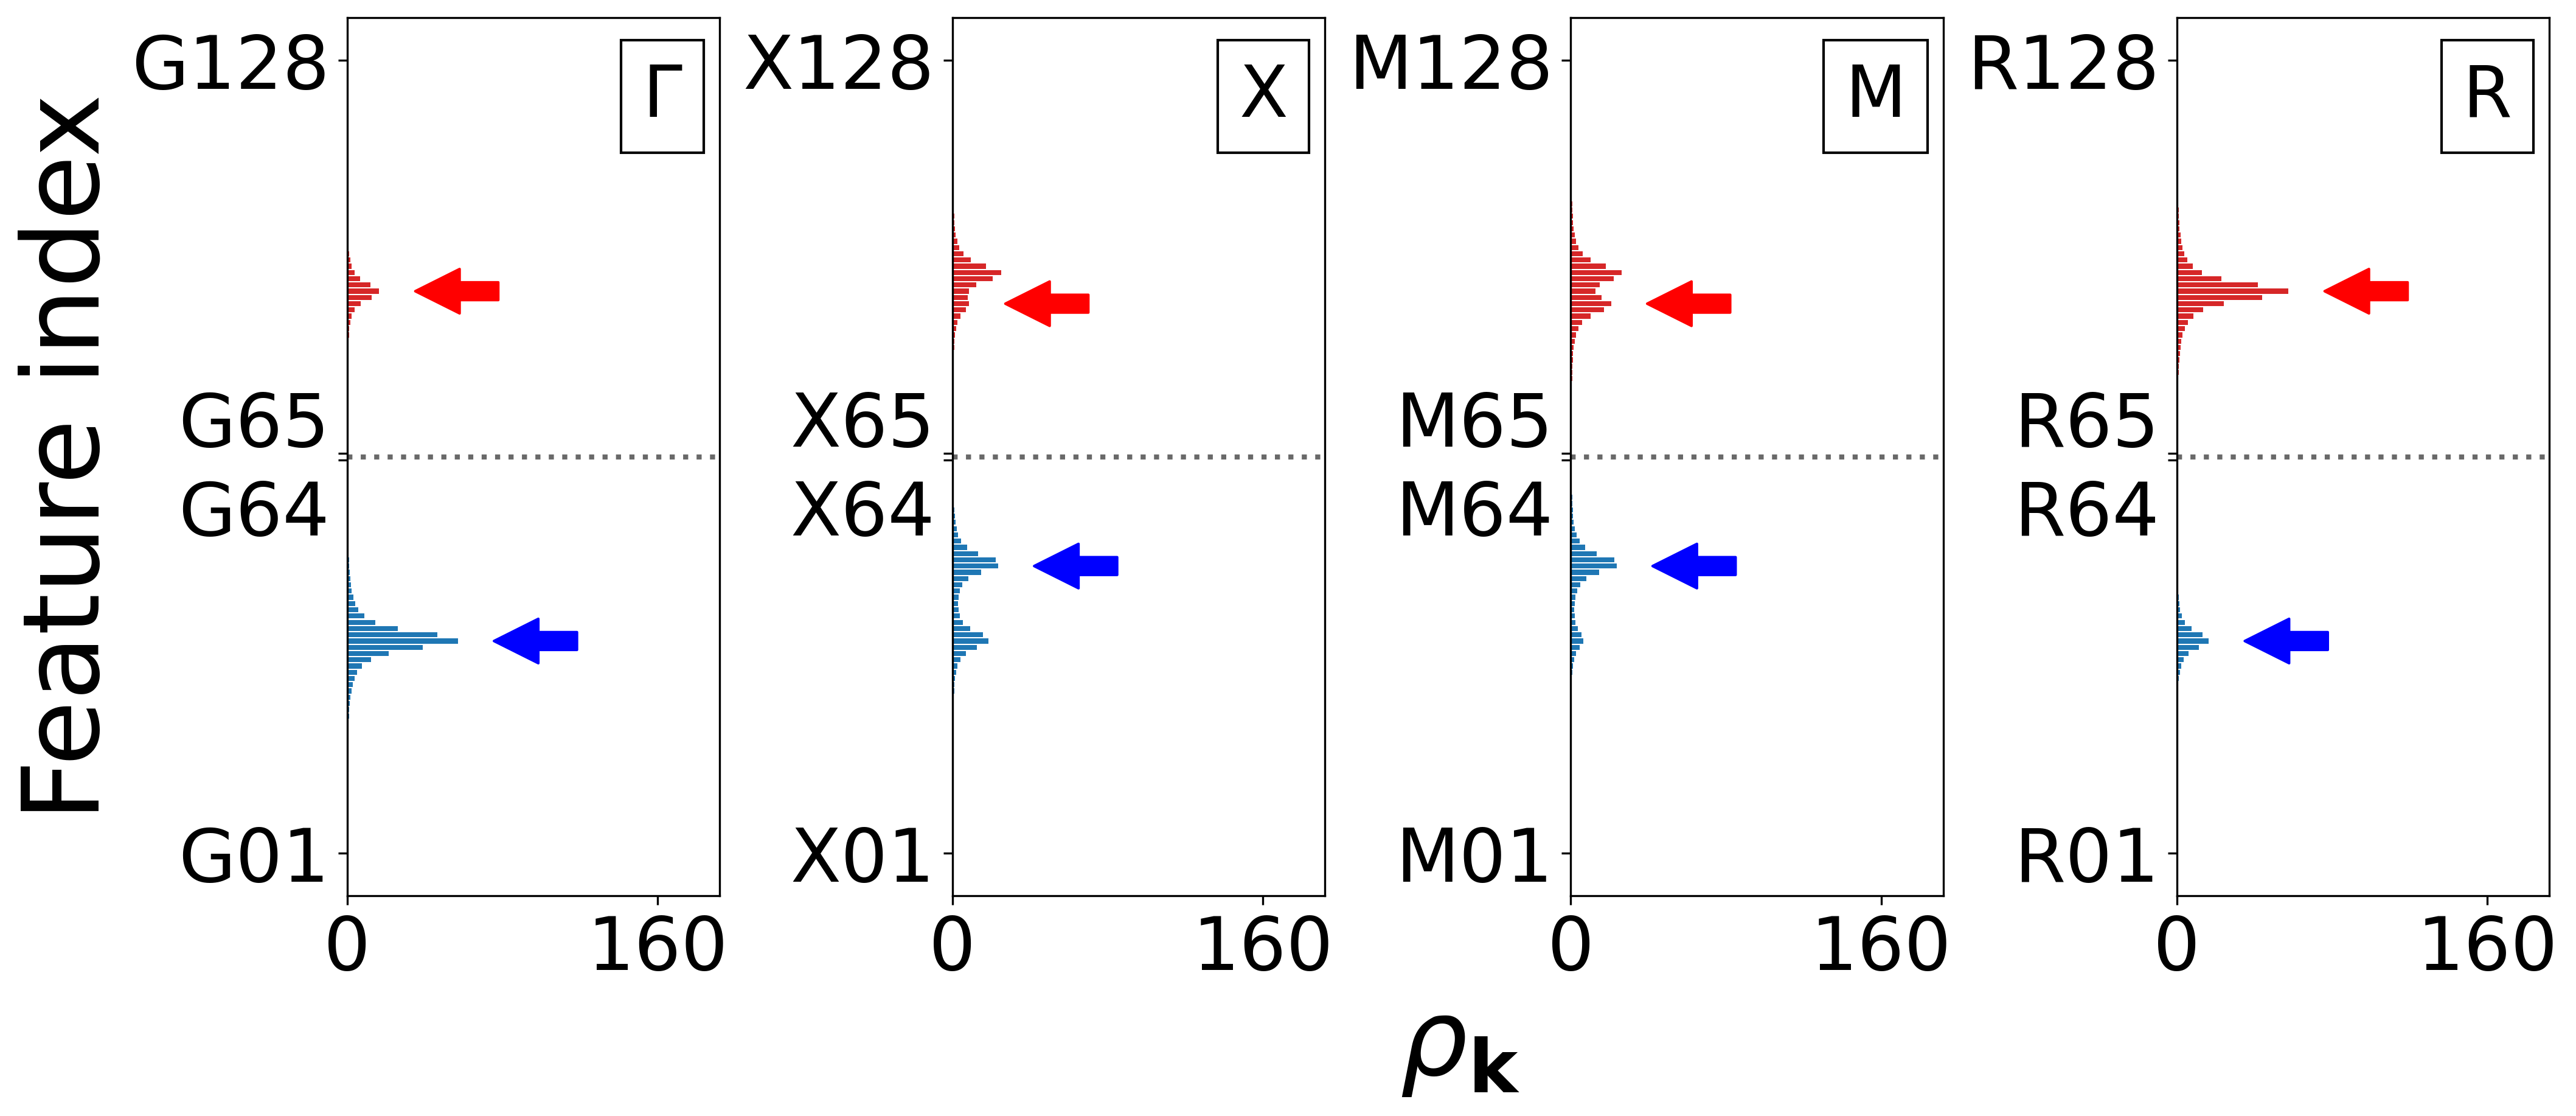

In [4]:
ShowPeak(name, 'dos_MK_eta0.20_bins128.h5', 'g', 0, 6, 6, xlim=160)

## DOS

## Optimizing

### Resampling

### Hyperparameter tuning

## Feature selection by PCA

## Unsupervised learning based on PCA